In [1]:
%load_ext autoreload
%autoreload 2

import os
import random

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

# fix gpu memory management 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# enable reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
def preview(size):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    fig, ax = plt.subplots(size, size)
    for i in range(size):
        for j in range(size):
            idx = np.random.choice(len(x_train))
            ax[i, j].imshow(x_train[idx])
            ax[i, j].axis('off')
            ax[i, j].set(title=labels[y_train[idx, 0]])

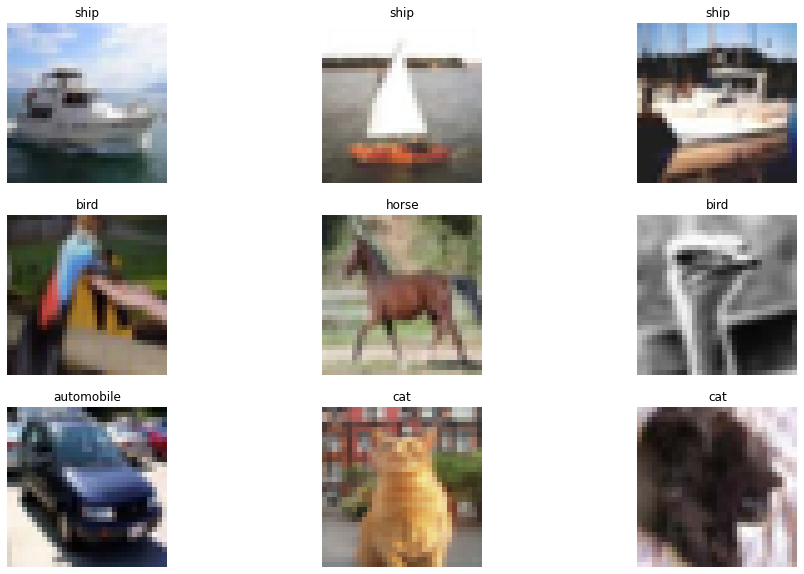

In [4]:
preview(3)

In [5]:
from src.model import SimpleNet
from src.signature import Signature

model = SimpleNet()

signature_length = int(model.count_params() * 1e-4)
sig = Signature(b'Some block information', signature_length)
other_sig = Signature(b"Some other block information", signature_length)
yet_another_sig = Signature(b"Some other block information", signature_length)

Compile model with 1,706,026 parameters
Create signature with 170 parameters
Create signature with 170 parameters
Create signature with 170 parameters


In [ ]:
train_parameters = {
    'steps_per_epoch' : None,
    'epochs' : 30,
    'validation_data' : (x_test,y_test),
    'batch_size' : 100

}

model.fit(x_train, y_train, **train_parameters)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
27900/50000 [===============>..............] - ETA: 5s - loss: 1.8308 - accuracy: 0.3210

In [ ]:
MODEL_NAME = '30epochs_baseline'
SAVING = False
if SAVING:
    model.save_weights(f'models/{MODEL_NAME}/model')
    model.save_training_plot(f'img/{MODEL_NAME}.svg')
    model.save_training_history(f'training_history/{MODEL_NAME}.csv')

In [ ]:
f = lambda x : "Verified" if x else "Not verified"
print(f"Checking model against original signature : {f(sig.verify(model))}")
print(f"Checking model against another signature : {f(other_sig.verify(model))}")

In [ ]:
model.plot_training()